### **DIGIT RECOGNISER NEURAL NETWORK**
Frameworks Used: NumPy <br>
Dataset: MNIST Digit Recognizer Dataset

In this notebook, I aim to implement a basic two-layer neural network and train it on the MNIST digit recogniser dataset which contains sample hand-written digits of 28 x 28 pixel resolution. This was largely done with the help of Samson Zhang's YouTube tutorial.

In [19]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt 

data = pd.read_csv('train.csv')

In [30]:
data = np.array(data)
m, n = data.shape

#shuffles the data before splitting it into dev and training sets
np.random.shuffle(data)

#splitting the data into training and dev sets so that the model does not overfit the data

#we will test the accuracy of the model on the data_dev set
data_dev = data[0:1000].T 
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

#we will train the model on the data_train set
data_train = data[1000:m].T 
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_, m_train = X_train.shape


In [21]:
Y_train

array([2, 7, 0, ..., 1, 0, 8], dtype=int64)

The Neural Network will have a two-layer architecture. The input layer $a^{[0]}$ will have 784 units corresponding to the pixels in the input image (28 x 28 pixels). The hidden layer $a^{[1]}$ will have 10 units with ReLU activation, and the output layer $a^{[2]}$ will have 10 units corresponding to the ten digit classes we aim to classify the image into, with softmax activation.


## The Math

**Forward Propagation**

$$Z^{[1]} = W^{[1]}X + b^{[1]}$$
$$A^{[1]} = g_{\text{ReLU}}(Z^{[1]})$$
$$Z^{[2]} = W^{[2]}A^{[1]} + b^{[2]}$$
$$A^{[2]} = g_{\text{softmax}}(Z^{[2]})$$

**Backward propagation**

$$dZ^{[2]} = A^{[2]} - Y$$
$$dW^{[2]} = \frac{1}{m} dZ^{[2]} A^{[1]T}$$
$$dB^{[2]} = \frac{1}{m} \Sigma {dZ^{[2]}}$$
$$dZ^{[1]} = W^{[2]T} dZ^{[2]} .* g^{[1]\prime} (z^{[1]})$$
$$dW^{[1]} = \frac{1}{m} dZ^{[1]} A^{[0]T}$$
$$dB^{[1]} = \frac{1}{m} \Sigma {dZ^{[1]}}$$

**Parameter updates**

$$W^{[2]} := W^{[2]} - \alpha dW^{[2]}$$
$$b^{[2]} := b^{[2]} - \alpha db^{[2]}$$
$$W^{[1]} := W^{[1]} - \alpha dW^{[1]}$$
$$b^{[1]} := b^{[1]} - \alpha db^{[1]}$$



In [22]:
def init_parameters():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def SoftMax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = SoftMax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [28]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_parameters()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 100 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [29]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[1 5 6 ... 1 5 1] [2 7 0 ... 1 0 8]
0.13965853658536587
Iteration:  100
[2 7 3 ... 1 3 8] [2 7 0 ... 1 0 8]
0.5865121951219512
Iteration:  200
[2 7 0 ... 1 0 8] [2 7 0 ... 1 0 8]
0.7531463414634146
Iteration:  300
[2 7 0 ... 1 0 8] [2 7 0 ... 1 0 8]
0.8081219512195122
Iteration:  400
[2 7 0 ... 1 0 8] [2 7 0 ... 1 0 8]
0.8341219512195122


In [25]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [2]
Label:  2


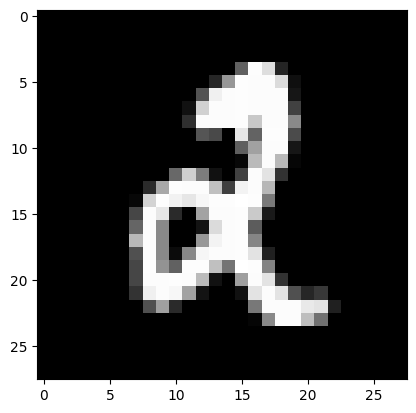

Prediction:  [7]
Label:  7


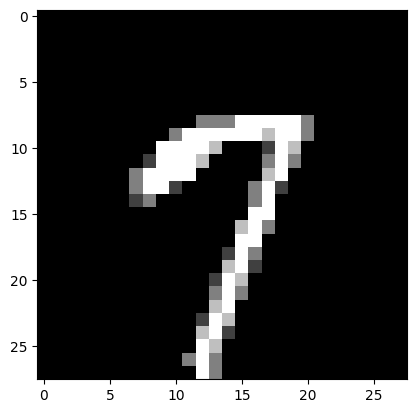

Prediction:  [0]
Label:  0


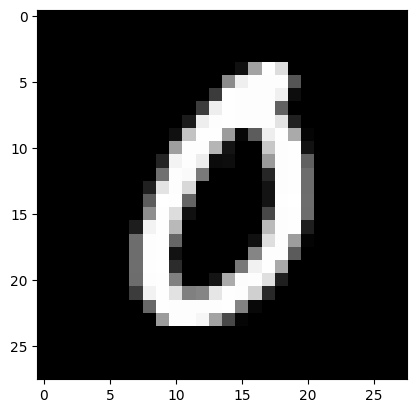

Prediction:  [5]
Label:  5


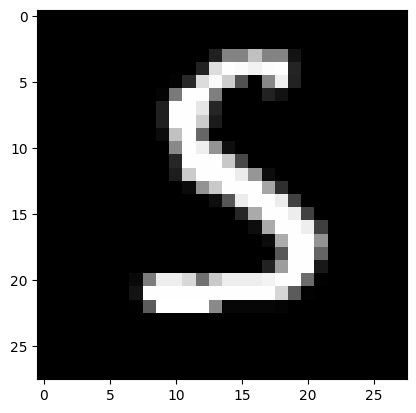

In [26]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [27]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[2 5 1 7 9 8 9 0 9 0 9 9 1 9 1 0 0 8 5 8 2 3 3 6 8 4 5 9 7 2 8 4 8 8 0 9 2
 8 3 2 0 7 0 5 8 1 3 0 5 3 6 4 9 8 6 0 3 0 4 1 9 4 8 2 9 7 9 7 7 7 4 1 4 7
 6 8 7 6 6 7 6 0 3 7 6 8 0 2 1 9 6 0 6 4 1 6 7 2 1 9 1 6 5 9 5 4 0 3 7 5 3
 0 8 4 8 1 2 4 1 0 6 1 4 7 9 1 1 7 9 8 6 9 4 8 6 4 2 3 4 9 4 2 2 8 0 0 9 2
 4 4 3 3 2 2 9 6 3 0 2 7 4 7 5 8 6 6 8 3 4 4 6 7 6 6 0 0 1 7 1 0 8 5 1 9 5
 4 1 1 9 6 9 1 3 7 7 9 9 8 2 5 0 6 3 6 8 4 6 8 1 3 7 3 7 8 2 6 8 8 0 1 6 0
 3 7 6 1 7 3 5 2 7 5 0 8 2 7 2 3 2 2 7 4 8 9 0 0 4 0 1 1 3 9 0 6 1 5 1 1 0
 2 7 4 4 5 8 7 7 3 3 7 9 8 5 2 6 2 8 9 1 8 7 1 6 4 5 4 1 9 0 6 0 5 2 8 1 8
 0 3 7 3 9 5 6 4 6 4 7 6 9 5 1 6 3 4 6 6 1 8 6 6 4 9 4 4 6 3 4 5 9 4 2 6 4
 6 8 7 1 1 8 4 6 1 5 1 3 5 7 1 2 1 4 6 7 0 2 3 9 3 9 5 7 5 5 9 7 2 1 1 0 6
 3 7 8 9 7 2 7 9 8 2 1 5 1 7 1 8 3 1 6 1 4 4 3 2 2 1 8 3 7 9 2 0 4 7 9 0 2
 1 6 8 7 4 7 4 3 4 9 5 5 1 3 7 9 0 6 3 2 4 4 2 9 2 9 0 7 3 0 4 2 4 1 1 6 3
 7 2 4 0 8 4 9 8 6 6 7 6 4 0 6 3 5 1 6 4 7 8 6 5 3 5 6 6 3 4 1 9 2 6 0 0 0
 5 4 1 3 4 5 9 4 1 5 0 4 

0.86

The accuracy is about 86% meaning the model generalized from the training data pretty well.